# 타이타닉 데이터를 활용한 데이터 분석

# 1. 라이브러리 및 데이터
# Library & Data

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

In [2]:
 # 데이터 불러오기
train = pd.read_csv('G:\내 드라이브\Github\Dacon-practice\타이타닉 생존자 예측/train.csv') # 모델 학습 파일
test = pd.read_csv('G:\내 드라이브\Github\Dacon-practice\타이타닉 생존자 예측/test.csv') # 모델 시험지 파일
sub = pd.read_csv('G:\내 드라이브\Github\Dacon-practice\타이타닉 생존자 예측/sample_submission.csv') #답안지 파일

# 2. 탐색적 자료분석
# Exploratory Data Analysis (EDA)

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


pd.Series_value_counts() # Series에서만 정상적으로 작동!

- series 내 고유값들 각각의 개수를 보여주는 함수
- 가장 많이 나오는 고유값들 순서로 보여줍니다.
- 비어있는 값은 고려하지 않습니다.

In [7]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
train.groupby('Sex').mean()

PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893

In [10]:
train.groupby('Pclass').mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550

pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다.
- value_counts()의 결과물을 보여줄 때 유용합니다.
- groupby된 결과물을 보여줄 때 유용합니다.

<AxesSubplot:xlabel='Pclass'>

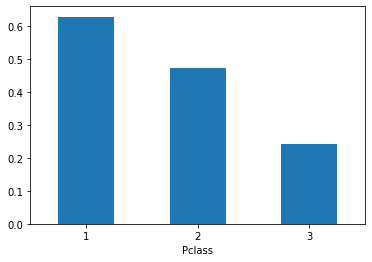

In [13]:
train.groupby('Pclass').mean()['Survived'].plot(kind='bar', rot = 0) # 각도 0

pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!

<AxesSubplot:ylabel='Frequency'>

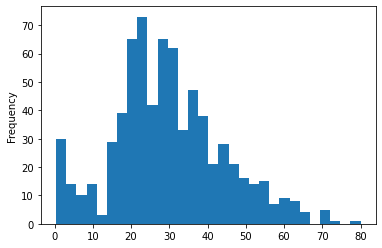

In [18]:
train['Age'].plot(kind='hist', bins = 30) # bins 촘촘한 정도

보조선 => grid = True

<AxesSubplot:ylabel='Frequency'>

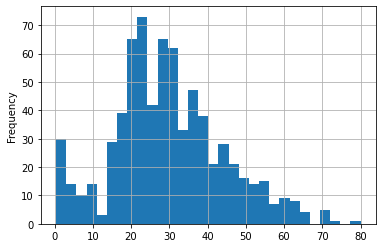

In [19]:
train['Age'].plot(kind='hist', bins = 30, grid=True) # bins 촘촘한 정도

pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

<AxesSubplot:xlabel='Age', ylabel='Fare'>

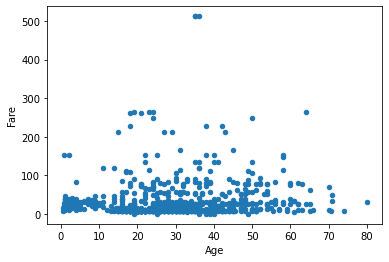

In [20]:
train.plot(x = 'Age', y = 'Fare', kind = 'scatter')

# 3. 데이터 전처리
# Data Cleansing & Pre-Processing

pd.Series.isna()
- 결측치 여부를 확인해준다.
- 결측치면 True 아니면 False


In [21]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시.
- 범주형 변수일 경우 최빈값으로 대체 가능.

In [25]:
train['Age'].median()

28.0

In [23]:
train['Age'] = train['Age'].fillna(28)

In [27]:
train['Embarked'].value_counts() # 문자열

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train['Embarked'] = train['Embarked'].fillna('S')

In [29]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

pd.Series.map()
- 시리즈 내 값을 변환할 때 사용하는 함수
- 문자열의 경우 숫자형으로 대체해주어야함. 모델에 넣기위해서

In [30]:
train['Sex'].map({'mail' : 0, 'female' : 1})

0      NaN
1      1.0
2      1.0
3      1.0
4      NaN
      ... 
886    NaN
887    1.0
888    1.0
889    NaN
890    NaN
Name: Sex, Length: 891, dtype: float64

# 4. 변수 선택 및 모델 구축
# Feature Engineering & Initial Modeling

sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

# 5. 모델 학습 및 검증
# Model Tuning & Evaluation

model.fit()

- 모델 학습

model.predict()

- 모델 예측

model.predict_proba()

- 모델 예측

pd.DataFrame.to_csv()

- csv파일 저장하는 함수